<a href="https://colab.research.google.com/github/josepefg/portfolio_projects/blob/main/Desafio_do_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.linkedin.com/in/josepegerent"> <img border="0" alt="Linkedin" src="https://img.shields.io/badge/Autor-josepefg-red.svg"> </a>
# **Desafio do MNIST**  


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(int)

In [6]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y

array([5, 0, 4, ..., 4, 5, 6])

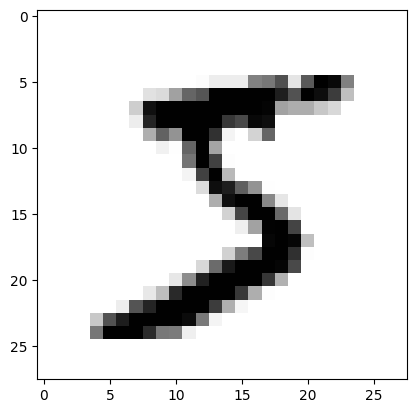

In [10]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

### Classificador binário

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
y_train_5 = (y_train == 5)

In [14]:
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


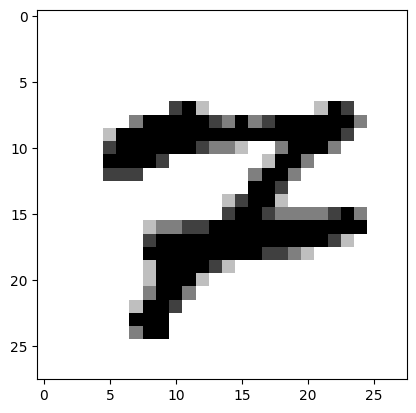

In [17]:
n = 2
plt.imshow(x_train[n].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96553202, 0.93803955, 0.9626523 ])

### A matriz de confusão

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

In [20]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44173,   424],
       [  847,  3556]])

In [21]:
y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.893467336683417
Recall:  0.8076311605723371


In [22]:
print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[44173   424]
 [  847  3556]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.99     44597
        True       0.89      0.81      0.85      4403

    accuracy                           0.97     49000
   macro avg       0.94      0.90      0.92     49000
weighted avg       0.97      0.97      0.97     49000



### Classificação multiclasse

In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [25]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [26]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4699    2   16    9    6   15   13    6   74    4]
 [   1 5303   32    7    8   18   13   27  149    3]
 [  49   59 4075   60   52   30   79  114  357   22]
 [  31   30  133 3857   11  172    9  134  517   68]
 [  19   18   34   11 4279   19   26   75  193  101]
 [  71   20   32  139   64 3294   78   41  601   63]
 [  67   31   72    5   34   89 4305   10  178    2]
 [  28    9   37   11   50   11    2 4687   45  262]
 [  40  101   42   55   53  122   28   52 4208   42]
 [  39   23   21   52  225   35    1  887  419 3178]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4844
           1       0.95      0.95      0.95      5561
           2       0.91      0.83      0.87      4897
           3       0.92      0.78      0.84      4962
           4       0.89      0.90      0.90      4775
           5       0.87      0.75      0.80      4403
           6       0.95      0.90      0.92      4793
           7       0.78      0.91   

<Axes: >

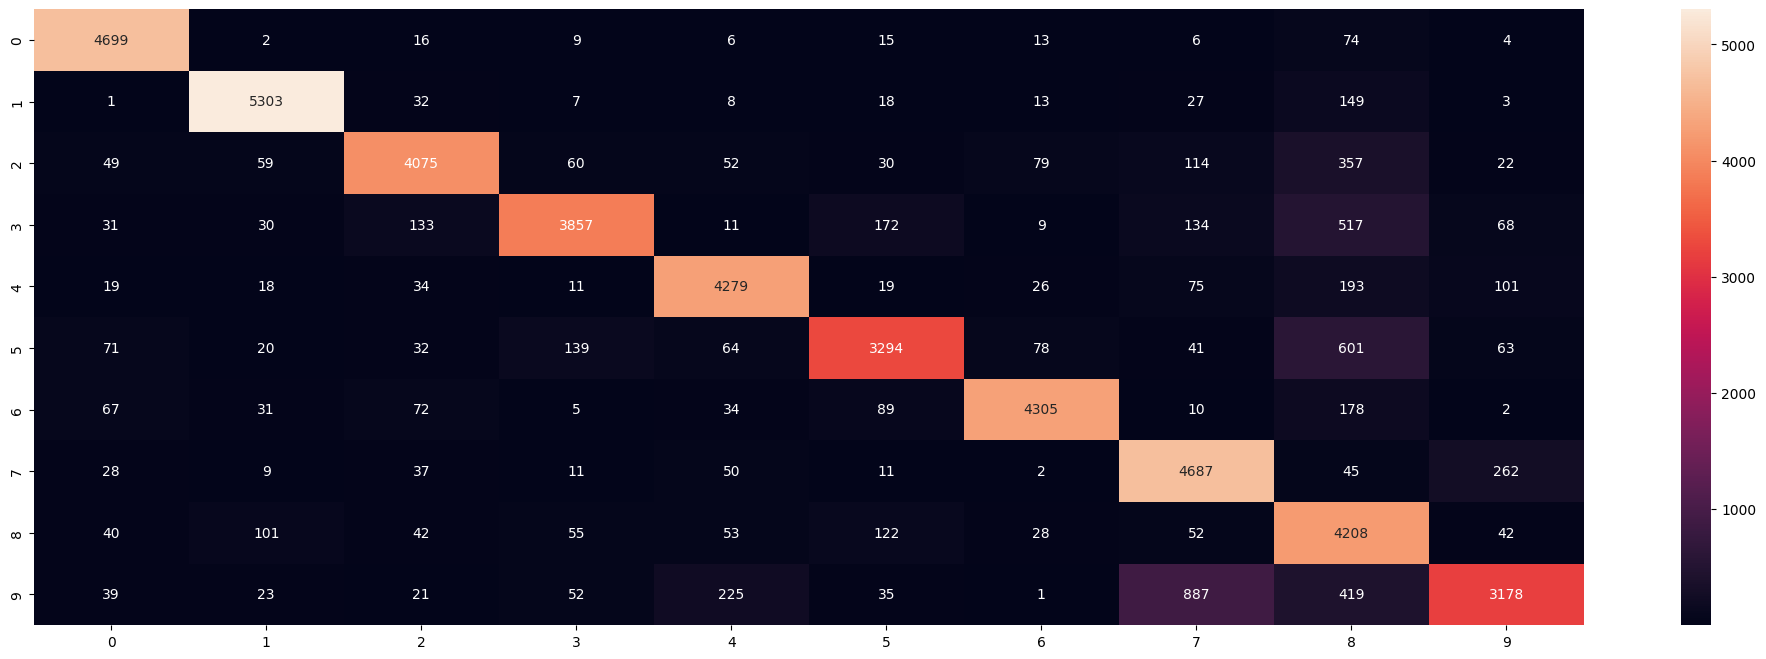

In [27]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

<Axes: >

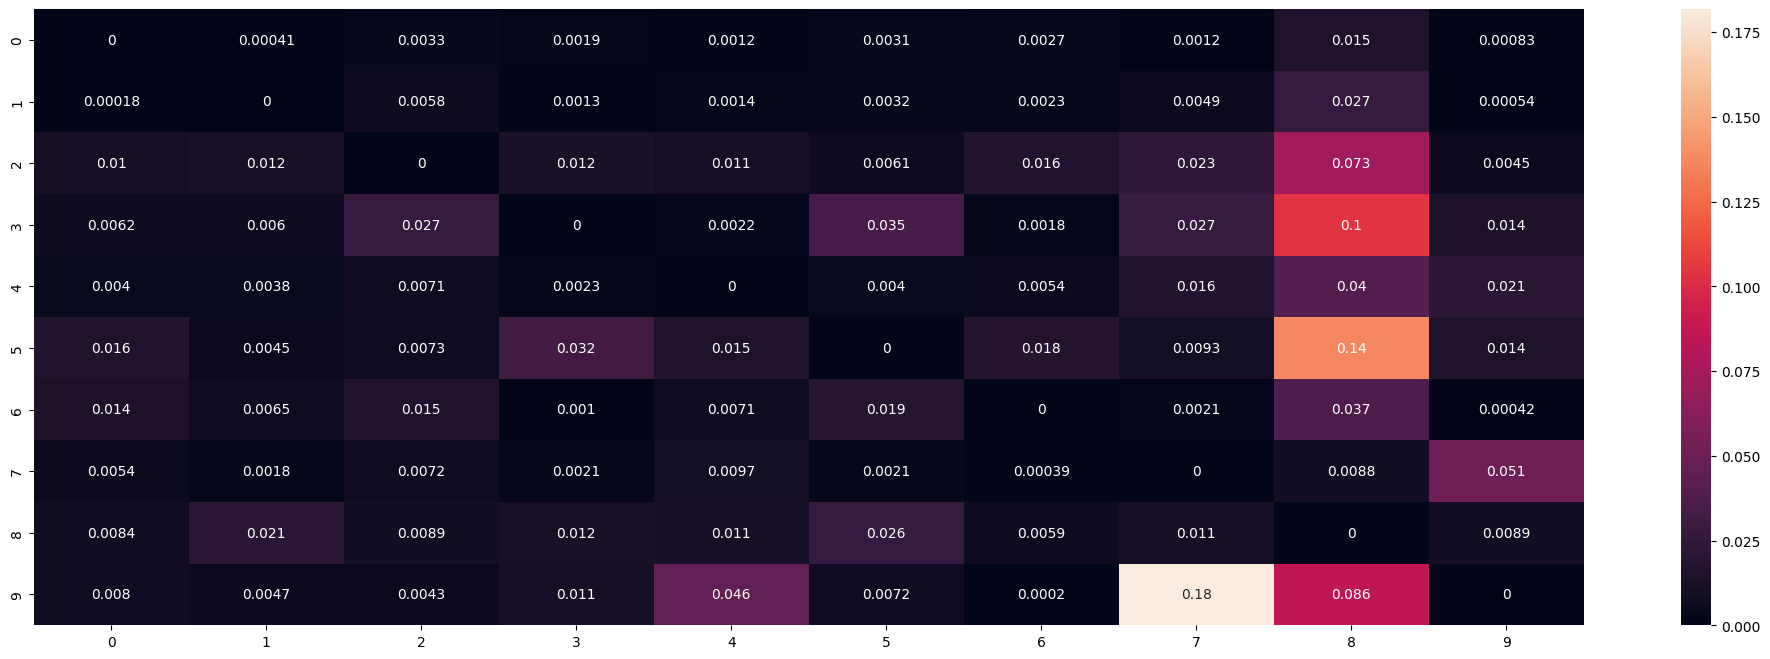

In [28]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

### Classificação multilabel

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 ==1)
y_multilabel = np.c_[y_train, y_train_large, y_train_odd]
y_multilabel

array([[5, 0, 1],
       [0, 0, 0],
       [7, 1, 1],
       ...,
       [0, 0, 0],
       [3, 0, 1],
       [7, 1, 1]])

In [46]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

[[5 0 1]]


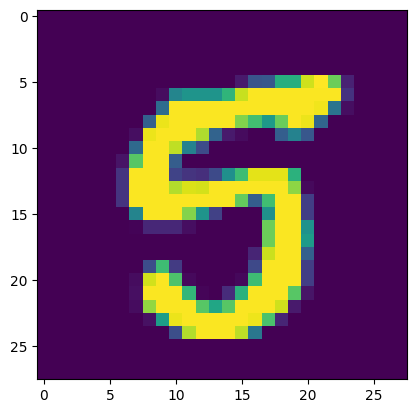

In [48]:
n = 0

digit = x_train[n]
print(knn_clf.predict([digit]))
plt.imshow(digit.reshape(28,28))